In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN
from sklearn.preprocessing import StandardScaler


In [29]:
df_swe_temp = pd.read_parquet('data/nrcs_snow_water_equivalent_and_temp.parquet')
df_swe_temp = df_swe_temp.set_index(['date','Station'])
df_swe_temp = df_swe_temp.drop(columns=['SNWD', 'TMAX', 'TMIN', 'PRCP', 'WTEQ'])

display(df_swe_temp)

PREC  TAVG
date       Station                               
1997-08-01 Station 345 - Bison Lake    48.2  50.5
1997-08-02 Station 345 - Bison Lake    48.2  55.0
1997-08-03 Station 345 - Bison Lake    48.5  54.9
1997-08-04 Station 345 - Bison Lake    48.6  50.0
1997-08-05 Station 345 - Bison Lake    48.8  46.0
...                                     ...   ...
2024-09-02 Station 618 - McClure Pass  32.4  58.1
2024-09-03 Station 345 - Bison Lake    36.9  52.3
           Station 618 - McClure Pass  32.4  59.0
2024-09-04 Station 345 - Bison Lake    37.1  45.5
2024-09-05 Station 345 - Bison Lake    37.1  43.7

[16245 rows x 2 columns]

array([[2.13231361, 0.87881707],
       [2.13231361, 1.14708554],
       [2.15587662, 1.14112401],
       ...,
       [0.89132829, 1.38554639],
       [1.26048215, 0.580741  ],
       [1.26048215, 0.47343361]])

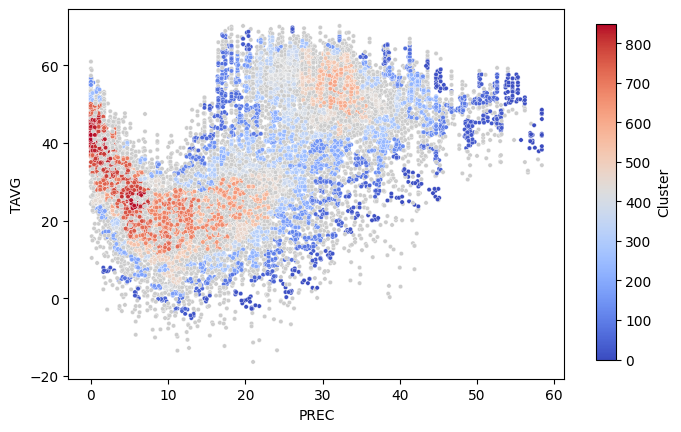

In [34]:
# dbscan
scaler = StandardScaler()
df = df_swe_temp.copy()
df = df.dropna()
X = df.values
X = scaler.fit_transform(X)
display(X)

dbscan = HDBSCAN(min_samples=5)
dbscan.fit(X)
df['dbscan'] = dbscan.labels_

# Create a scatterplot with seaborn
scatterplot = sns.scatterplot(data=df, x='PREC', y='TAVG', hue='dbscan', palette=palette, s=10, marker='o')

# Remove the default legend
scatterplot.legend_.remove()

# Add a colorbar to the scatterplot
cbar_ax = scatterplot.figure.add_axes([0.95, 0.15, 0.03, 0.7])  # [left, bottom, width, height]
gradient_legend = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=0, vmax=n_clusters))
gradient_legend.set_array([])
scatterplot.figure.colorbar(gradient_legend, cax=cbar_ax, label='Cluster')

### HDBSCAN Conclusions
We choose HDBSCAN so that the epsilon parameter does not need to be manually set. HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise) is an extension of DBSCAN that finds clusters of varying densities. It works by building a hierarchy of clusters and then condensing it based on the stability of the clusters. This allows it to handle data with varying densities more effectively than DBSCAN.

1. Cluster Patterns:

	•	Red/Orange regions on the left (low precipitation and moderate-to-high temperature): These indicate clusters of warmer regions with lower precipitation. The intensity of red suggests a strong cluster of locations with these characteristics.
	•	Blue regions on the right (moderate-to-high precipitation and moderate-to-low temperature): These points form distinct clusters in cooler, wetter conditions.
	•	Gray regions scattered throughout: The gray points represent outliers or noise, which were not assigned to a cluster by HDBSCAN. These could be transitional areas or unique weather conditions not following the more defined patterns.

2. Temperature vs. Precipitation Correlation:

	•	The graph shows a non-linear relationship between temperature and precipitation. At very low precipitation values, there is a wide range of average temperatures. However, as precipitation increases, the spread in temperatures narrows, especially around higher precipitation values, where the temperatures are generally lower (close to 0°C).
	•	This suggests that higher precipitation tends to occur in cooler climates, while drier regions (low precipitation) can have both hot and cold temperatures, forming the two major red and blue clusters.

3. Noise and Transition Zones:

	•	The central portion of the graph (around the 20-40 range for precipitation) shows more scattered points with lower cluster intensity (lighter shades), suggesting that this is a transitional zone between drier, warmer regions and wetter, cooler regions. This might be where the algorithm struggles to define strict cluster boundaries, hence the higher prevalence of noise points.
